# __[Ponpare](https://ponpare.jp/)__ coupons dataset exploration

Analysis of transactional data for 22873 users of the coupon japanese site Ponpare.
Dataset can be found on [Kaggle](https://www.kaggle.com/c/coupon-purchase-prediction/data)

By [nachogoca](https://github.com/nachogoca)

In [9]:
import pandas as pd

user_list = pd.read_csv('../data/user_list.csv')
coupon_visit = pd.read_csv('../data/coupon_visit_train.csv')

A glimpse of the transactional data

In [10]:
coupon_visit.head()

,PURCHASE_FLG,I_DATE,PAGE_SERIAL,REFERRER_hash,VIEW_COUPON_ID_hash,USER_ID_hash,SESSION_ID_hash,PURCHASEID_hash
0,0,2012-03-28 14:15:00,7,7d3892e54acb559ae36c459978489330,34c48f84026e08355dc3bd19b427f09a,d9dca3cb44bab12ba313eaa681f663eb,673af822615593249e7c6a9a1a6bbb1a,NaN
1,0,2012-03-28 14:17:28,9,7d3892e54acb559ae36c459978489330,34c48f84026e08355dc3bd19b427f09a,d9dca3cb44bab12ba313eaa681f663eb,673af822615593249e7c6a9a1a6bbb1a,NaN
2,0,2012-03-28 14:20:05,16,7d3892e54acb559ae36c459978489330,17c450c3b470c045d35ec22b02daa690,d9dca3cb44bab12ba313eaa681f663eb,673af822615593249e7c6a9a1a6bbb1a,NaN
3,0,2012-03-28 14:23:16,18,7d3892e54acb559ae36c459978489330,91a15e6a95d09e5e01b50747833b317d,d9dca3cb44bab12ba313eaa681f663eb,673af822615593249e7c6a9a1a6bbb1a,NaN
4,0,2012-03-28 14:26:25,20,7d3892e54acb559ae36c459978489330,96fcbc8f6e45d5a2de1661eb140c6e82,d9dca3cb44bab12ba313eaa681f663eb,673af822615593249e7c6a9a1a6bbb1a,NaN


## How many coupons are seen in a session?

In [22]:
unique_sessions = coupon_visit.SESSION_ID_hash.unique()

In [23]:
items_seen_session = coupon_visit.groupby("SESSION_ID_hash").count()

In [24]:
items_seen_session = items_seen_session.loc[:,['PURCHASE_FLG']]
items_seen_session.columns = ["seen_count"]

In [25]:
items_seen_session.describe()

,seen_count
count,1.046179e+06
mean,2.708122e+00
std,2.900859e+00
min,1.000000e+00
25%,1.000000e+00
50%,2.000000e+00
75%,3.000000e+00
max,1.590000e+02


### What is the distribution?

seen_count
1     461445
2     228061
3     124757
4      74769
5      47088
6      31063
7      21017
8      14808
9      10470
10      7612
dtype: int64
seen_count
101    1
122    1
133    1
150    1
159    1
dtype: int64


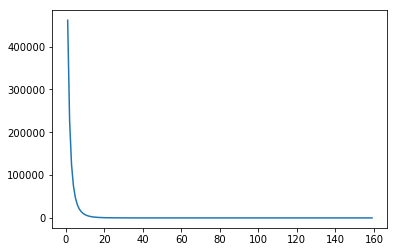

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
seen_dist = items_seen_session.groupby('seen_count').size()
print(seen_dist.head(10))
print(seen_dist.tail())
plt.plot(seen_dist.index, seen_dist.values)

In [17]:
items_bought_session = coupon_visit.groupby("SESSION_ID_hash").sum()['PURCHASE_FLG']
items_bought_session = items_bought_session[ items_bought_session > 0]

In [37]:
items_bought_seen_count = items_seen_session['seen_count'][items_bought_session].sort_values(ascending = False)

In [38]:
items_bought_seen_count.describe()

count    99032.000000
mean         4.448794
std          8.394998
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         26.000000
Name: seen_count, dtype: float64

In [55]:
bought_count = items_bought_seen_count.groupby(items_bought_seen_count).size()
bought_count

seen_count
1     82226
2       914
3       318
4         1
5         2
7        29
8      2708
26    12834
Name: seen_count, dtype: int64

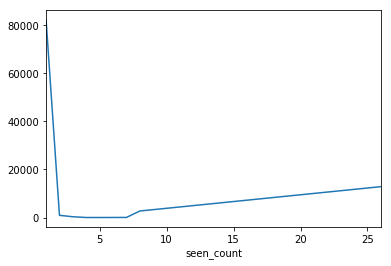

In [56]:
bought_count.plot()